In [32]:
import os as os
base_dir = "archive/files/"

class_folder_names = os.listdir(base_dir)
class_folder_names


['aneurysm', 'cancer', 'tumor']

In [46]:
# Preprocesamiento
import os
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np 

base_dir = "archive/files/"

class_folder_names = os.listdir(base_dir)

image_paths = []
classes = []

for cls in class_folder_names:
    class_path = os.path.join(base_dir, cls)
    
    if os.path.isdir(class_path):  # Verificar si es un directorio
        for file_name in os.listdir(class_path):
            if file_name.split('.')[-1] == 'jpg':
                image_paths.append(os.path.join(class_path, file_name))
                classes.append(cls)

classes[0:5]

le = LabelEncoder()
y = le.fit_transform(classes)
y = np.array(y)
print(y)

inputs = []

for i in tqdm(image_paths):  # image_paths[0:2]
    image = load_img(i)
    img_array = img_to_array(image)
    inputs.append(img_array)

X = np.array(inputs)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("Train data = ", X_train.shape,  y_train.shape)
print("Test data = ", X_test.shape,  y_test.shape)

X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

print("Flattened Train data = ", X_train_flattened.shape,  y_train.shape)
print("Flattened Test data = ", X_test_flattened.shape,  y_test.shape)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]






































































































































































































100%|██████████| 259/259 [00:06<00:00, 41.15it/s]


Train data =  (207, 512, 512, 3) (207,)
Test data =  (52, 512, 512, 3) (52,)
Flattened Train data =  (207, 786432) (207,)
Flattened Test data =  (52, 786432) (52,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


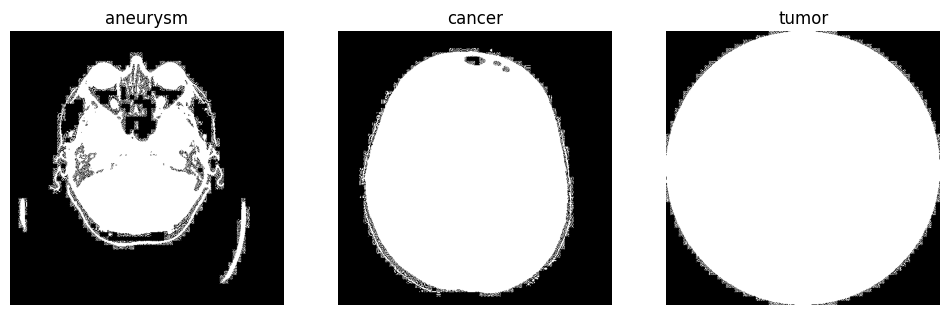

In [49]:
# Visualizacion de los datos
import plotly.express as px
import matplotlib.pyplot as plt



unique_classes = np.unique(y_train)
class_indices = {class_id: np.where(y_train == class_id)[0] for class_id in unique_classes}
class_indices


images_count = [len(class_indices[key]) for key in class_indices.keys()]

fig = px.bar(x=class_folder_names, y=images_count, color= class_folder_names)

fig.update_layout(xaxis_title='Disease', yaxis_title='Count', title="Total samples for each class", )
fig.update_traces(texttemplate='%{y}', textposition='inside')

fig.show()

plt.figure(figsize=(12, 5))

for i, (class_id, indices) in enumerate(class_indices.items()):
    random_index = np.random.choice(indices)
    random_image = X_train[random_index] 

    plt.subplot(1, len(unique_classes), i + 1)
    plt.imshow(random_image)
    plt.title(class_folder_names[class_id])
    plt.axis('off')

plt.show()

Found 259 files belonging to 3 classes.
Original Images:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Augmented Images:
Normalized Images:


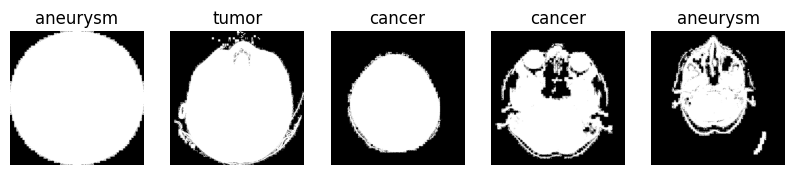

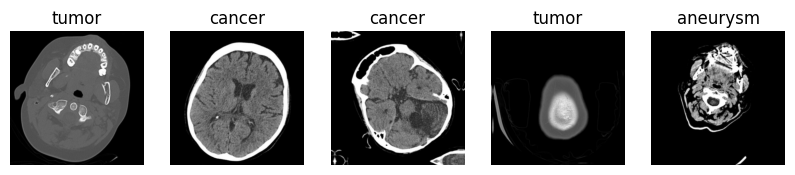

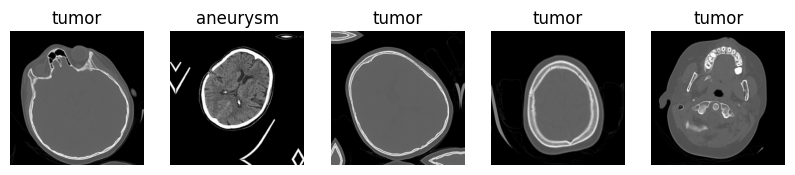

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Constants
IMAGE_SIZE = 516
BATCH_SIZE = 32

# Load dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "archive/files",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

# Get class names
class_names = dataset.class_names

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

# Apply data augmentation to the dataset, including rescaling
augmented_dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y))
augmented_dataset = augmented_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Normalize pixel values to [0, 1] using Rescaling
normalized_dataset = augmented_dataset.map(lambda x, y: (x, y))
normalized_dataset = normalized_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# Function to display images from a dataset
def show_images(dataset, num_batches=1, num_images=5):
    plt.figure(figsize=(10 * num_batches, 10 * num_images))
    for batch_num, (images, labels) in enumerate(dataset.take(num_batches)):
        for i in range(num_images):
            ax = plt.subplot(num_batches, num_images, batch_num * num_images + i + 1)
            plt.imshow(images[i].numpy().astype("float32"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

# Display original images
print("Original Images:")
show_images(dataset)

# Display augmented images
print("Augmented Images:")
show_images(augmented_dataset)

# Display normalized images
print("Normalized Images:")
show_images(normalized_dataset)

plt.show()


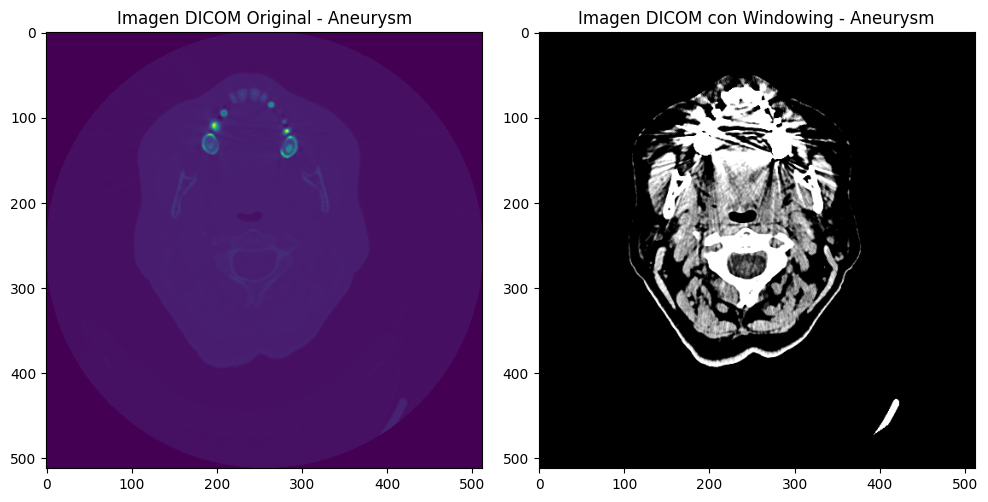

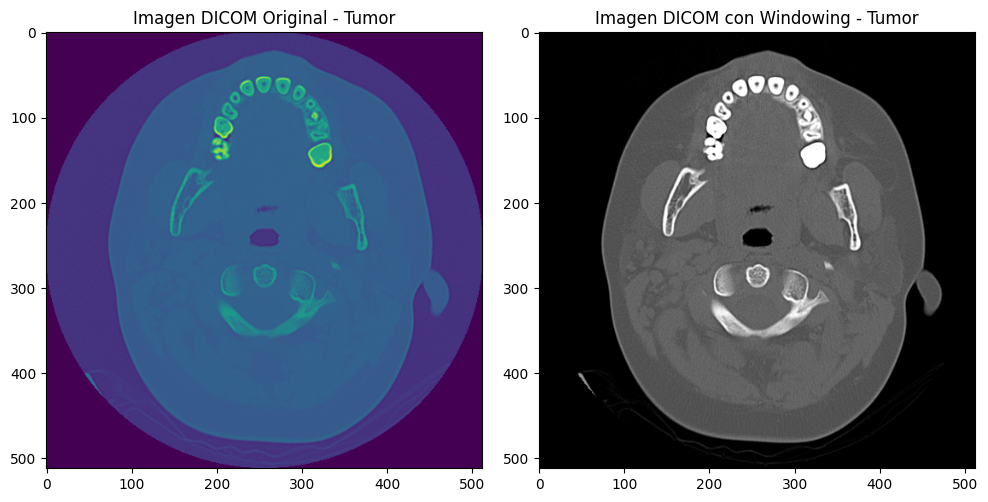

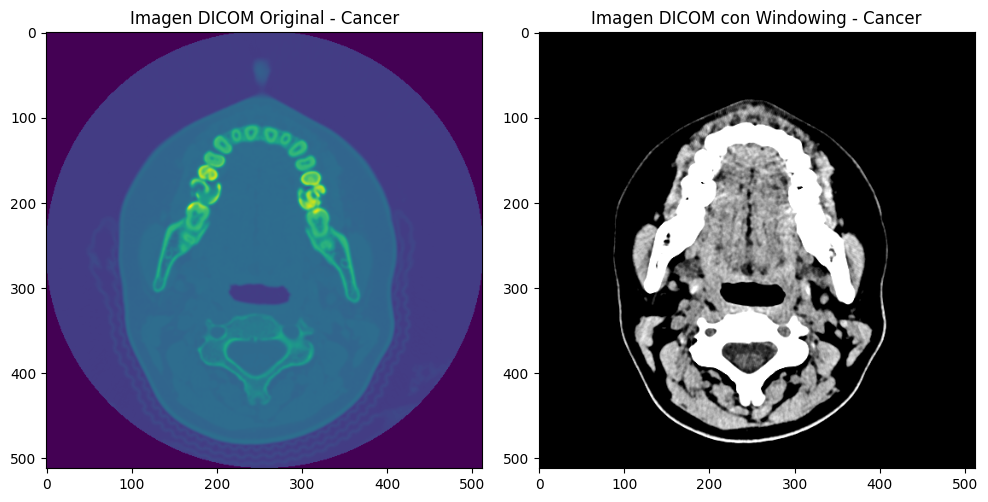

In [25]:
import matplotlib.pyplot as plt
import pydicom as dicom
import os

def load_and_display_images(disease_folder, title):
    # Obtener la lista de archivos en el directorio de la enfermedad
    files = os.listdir(disease_folder)
    
    # Filtrar archivos para obtener imágenes DICOM
    dcm_files = [file for file in files if file.lower().endswith(".dcm")]

    # Cargar la primera imagen DICOM
    dcm_path = os.path.join(disease_folder, dcm_files[0])
    dcm_dataset = dicom.dcmread(dcm_path)

    # Obtener la imagen y aplicar windowing
    dcm_image = dcm_dataset.pixel_array
    window_center = dcm_dataset.WindowCenter if hasattr(dcm_dataset, 'WindowCenter') else dcm_image.mean()
    window_width = dcm_dataset.WindowWidth if hasattr(dcm_dataset, 'WindowWidth') else dcm_image.max() - dcm_image.min()
    img_min = window_center - window_width / 2
    img_max = window_center + window_width / 2
    dcm_image = np.clip(dcm_image, img_min, img_max)

    # Crear subgráficos
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Mostrar la imagen original en el primer subgráfico
    axs[0].imshow(dcm_dataset.pixel_array)
    axs[0].set_title(f'Imagen DICOM Original - {title}')

    # Mostrar la imagen con windowing en el segundo subgráfico
    axs[1].imshow(dcm_image, cmap='gray')
    axs[1].set_title(f'Imagen DICOM con Windowing - {title}')

    # Ajustar el diseño y mostrar la figura
    plt.tight_layout()
    plt.show()

# Directorios para cada enfermedad
aneurysm_folder = "archive/files/aneurysm"
tumor_folder = "archive/files/tumor"
cancer_folder = "archive/files/cancer"

# Visualizar imágenes para cada enfermedad
load_and_display_images(aneurysm_folder, "Aneurysm")
load_and_display_images(tumor_folder, "Tumor")
load_and_display_images(cancer_folder, "Cancer")


(516, 516, 3)


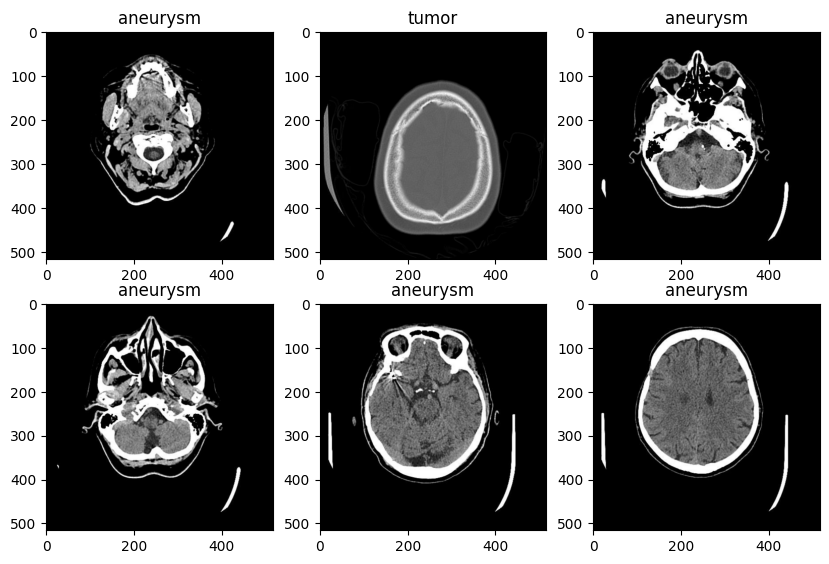

In [2]:
# Get class names
class_names = dataset.class_names

for img,label in dataset.take(1):
    print(img[0].shape)
    plt.figure(figsize=(10,10))
    for i in range(6):        
        plt.subplot(3,3,i+1)
        plt.title(class_names[label[i]])
        plt.imshow(img[i].numpy().astype("uint8"))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


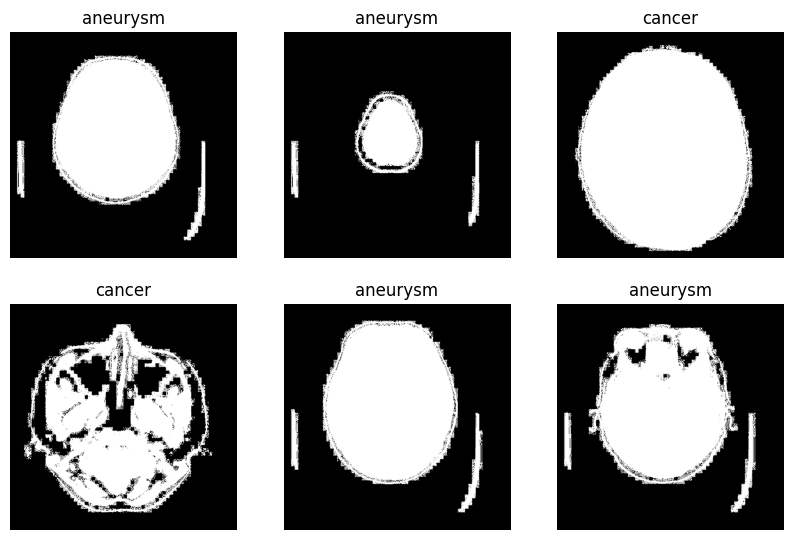

In [3]:
class_names = dataset.class_names

def split_train_test_val(ds,train_split=0.8,test_split=0.1,val_split=0.1,shuffle=False):
    ds_size = len(ds)
    train_size = round(train_split*ds_size)
    test_size = round(test_split*ds_size)
    val_size = round(val_split*ds_size)
    if shuffle:
        ds = ds.shuffle()
        
    train_ds = ds.take(train_size)    
    test_ds = ds.skip(train_size).take(test_size)
    val_ds = ds.skip(train_size).skip(test_size)
    return train_ds,test_ds,val_ds

train_ds,test_ds,val_ds = split_train_test_val(ds=dataset)


for batch , label in train_ds.take(1):
    plt.figure(figsize=(10,10))
    for idx in range(6):
        plt.subplot(3,3,idx+1)
        plt.imshow(batch[idx].numpy())
        plt.title(class_names[label[idx].numpy()])
        plt.axis("off")
        


In [4]:
tarin_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
class_names = dataset.class_names


from tensorflow.keras import models,layers

image_preprocessing = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE,IMAGE_SIZE,
    interpolation='bilinear',
    crop_to_aspect_ratio=False),
    layers.Rescaling(1./255),
#     layers.RandomFlip("horizontal_and_vertical"),
#     layers.RandomRotation(0.2),
])

BATCH = 32
CHANNELS = 3

input_size = (BATCH,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model = models.Sequential([
    image_preprocessing,
    layers.Conv2D(32,(8,8),activation='relu',input_shape=input_size),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='valid'),
    layers.Conv2D(64,kernel_size=(4,4),activation='relu'),
    layers.Dropout(.2),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names),activation='softmax')
])

model.build(input_shape=input_size)

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 516, 516, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 509, 509, 32)        6176      
                                                                 
 max_pooling2d (MaxPooling2  (32, 254, 254, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 251, 251, 64)        32832     
                                                                 
 dropout (Dropout)           (32, 251, 251, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (32, 249, 249, 64)        36928     
                                                     

In [5]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=90,
    show_layer_activations=True,
    show_trainable=True
)




You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [9]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

EPOCHS = 10
history = model.fit(train_ds,epochs=EPOCHS,validation_data=val_ds,verbose=1)

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


train_hist = history.history
epochs = list(range(EPOCHS))
plt.plot(epochs,train_hist['val_accuracy'],label="val_accuracy")
plt.plot(epochs,train_hist['accuracy'],label="accuracy")
plt.legend(loc="lower right")



Epoch 1/10




: 

In [6]:

train_hist = history.history
epochs = list(range(EPOCHS))
plt.plot(epochs,train_hist['val_accuracy'],label="val_accuracy")
plt.plot(epochs,train_hist['accuracy'],label="accuracy")
plt.legend(loc="lower right")

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
plt.plot(epochs,train_hist['loss'],label="loss")
plt.plot(epochs,train_hist['val_loss'],label="val_loss")
plt.legend(loc="upper right")

In [ ]:
score = model.evaluate(test_ds)
score

1/1 [==============================] - 5s 5s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 4s 4s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 4s 4s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 4s 4s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 3s 3s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 5s 5s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


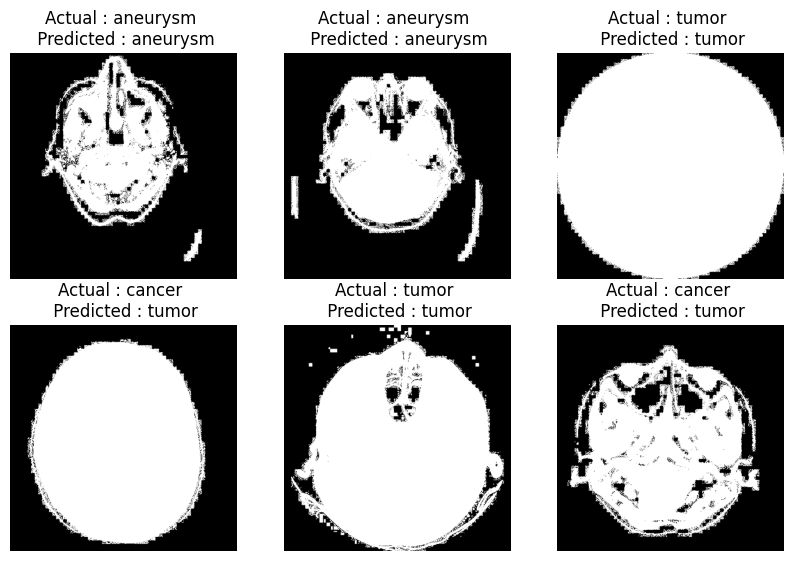

In [9]:
for img,label in test_ds.take(1):
    plt.figure(figsize=(10,10))
    for i in range(6):
        plt.subplot(3,3,i+1)
        pred = model.predict(img.numpy())
        plt.title(f"Actual : {class_names[label.numpy()[i]]} \n Predicted : {class_names[np.argmax(pred[i])]}")
        plt.imshow(img[i].numpy())
        plt.axis("off")

In [ ]:
model.save("model1.keras")